# Data Analysis And Machine Learning using Campus Placement Dataset

        * Explatory Data Analysis
        * Predicting whether student gets hired or not 
        * Determining factors that influence placement
        * Determining factors influencing salary of recruits.        

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv


In [2]:
my_filepath = "../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv"

In [3]:
my_data = pd.read_csv(my_filepath, index_col="sl_no")

In [4]:
my_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
my_data.shape

(215, 14)

In [6]:
my_data.info

<bound method DataFrame.info of       gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
...      ...    ...      ...    ...      ...       ...       ...        ...   
211        M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
212        M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
213        M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
214        F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
215        M  62.00 

In [7]:
my_data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
my_data.describe(include=object)

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [9]:
missing_values = my_data.isnull()
missing_values.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_values.columns.values.tolist():
    print(column)
    print (missing_values[column].value_counts())
    print("")

gender
False    215
Name: gender, dtype: int64

ssc_p
False    215
Name: ssc_p, dtype: int64

ssc_b
False    215
Name: ssc_b, dtype: int64

hsc_p
False    215
Name: hsc_p, dtype: int64

hsc_b
False    215
Name: hsc_b, dtype: int64

hsc_s
False    215
Name: hsc_s, dtype: int64

degree_p
False    215
Name: degree_p, dtype: int64

degree_t
False    215
Name: degree_t, dtype: int64

workex
False    215
Name: workex, dtype: int64

etest_p
False    215
Name: etest_p, dtype: int64

specialisation
False    215
Name: specialisation, dtype: int64

mba_p
False    215
Name: mba_p, dtype: int64

status
False    215
Name: status, dtype: int64

salary
False    148
True      67
Name: salary, dtype: int64



Non numeric value in salary is replaced with 0 since these persons are not placed

In [11]:
my_data["salary"]=my_data["salary"].fillna(0)

In [12]:
my_data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [13]:
print(my_data.status.value_counts(),"\n",
my_data.status.value_counts(normalize=True))

Placed        148
Not Placed     67
Name: status, dtype: int64 
 Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64


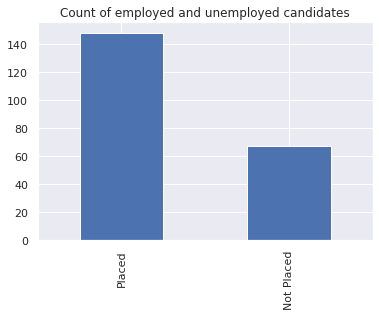

In [14]:

my_data.status.value_counts().plot.bar(title='Count of employed and unemployed candidates')

* 1. We see that there majority of the candidates are employed.

Checking the number of candidates corresponding to the various categories  (categorical variables) below:

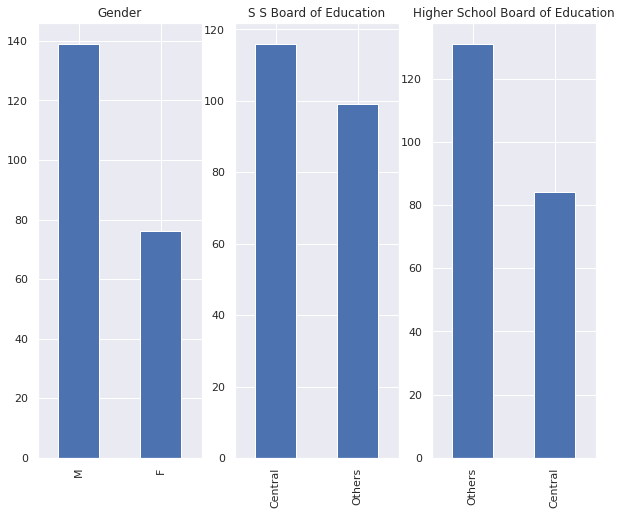

In [15]:
plt.figure(1) 
plt.subplot(131)
my_data.gender.value_counts().plot.bar(figsize=(10,8), title="Gender")
plt.subplot(132)
my_data.ssc_b.value_counts().plot.bar(figsize=(10,8),title="S S Board of Education")
plt.subplot(133)
my_data.hsc_b.value_counts().plot.bar(figsize=(10,8), title ="Higher School Board of Education")
plt.show()


* Most of the candidates are males.


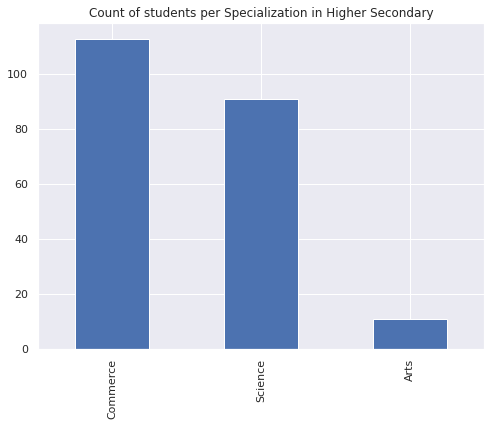

In [16]:
plt.figure() 
my_data.hsc_s.value_counts().plot.bar(figsize=(8,6), title="Count of students per Specialization in Higher Secondary")
plt.show()

* Majority of students studied Commerce in Higher Secondary School.

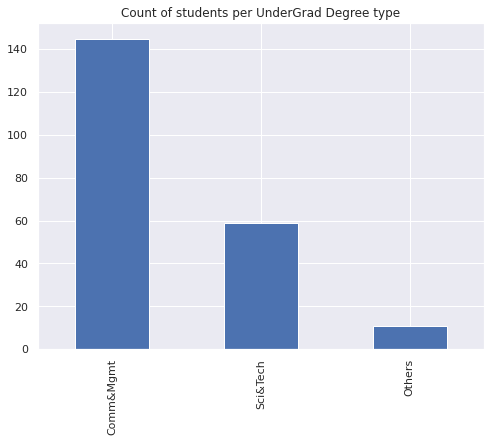

In [17]:
my_data.degree_t.value_counts().plot.bar(figsize=(8,6),title="Count of students per UnderGrad Degree type")

* Most of the Candidates studied Comm&Mgmt in their undergraduate studies.


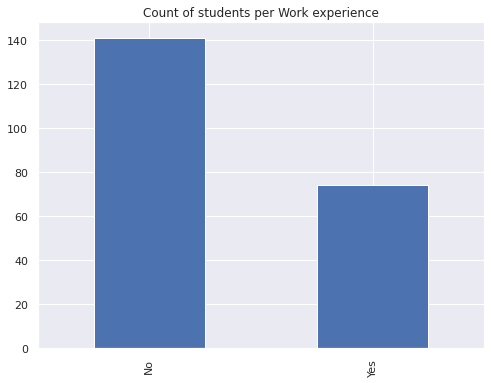

In [18]:
my_data.workex.value_counts().plot.bar(figsize=(8,6), title ="Count of students per Work experience")

* Most of the cadidates had no prior work experience

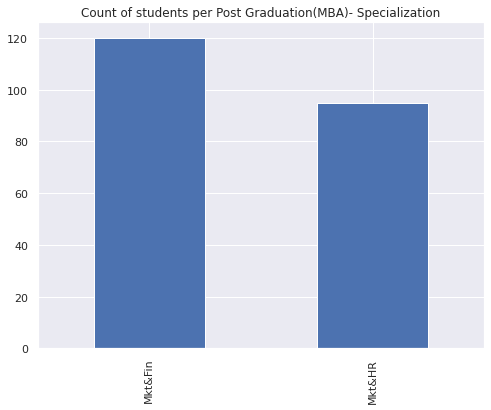

In [19]:
my_data.specialisation.value_counts().plot.bar(figsize=(8,6), title ="Count of students per Post Graduation(MBA)- Specialization")

* The prefared choice of post graduate studies amongst most of the students is Marketing and Finance

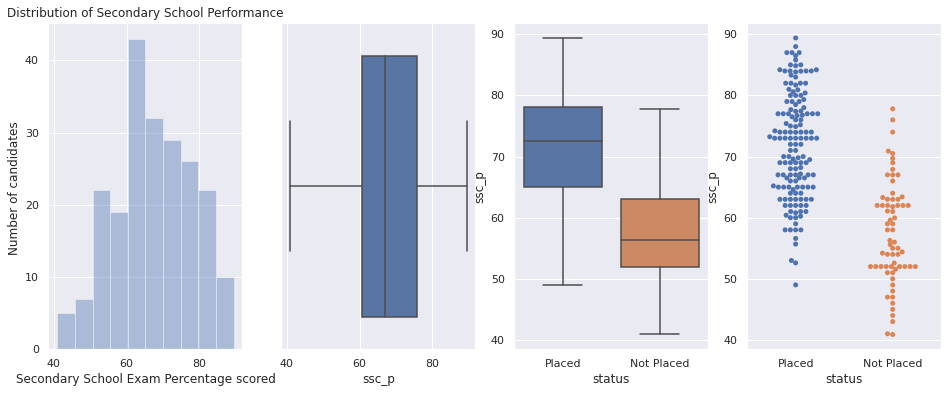

In [20]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of Secondary School Performance")
sns.distplot(a=my_data.ssc_p,kde=False)
plt.xlabel("Secondary School Exam Percentage scored")
plt.ylabel("Number of candidates ")
plt.subplot(142)
sns.boxplot(x=my_data.ssc_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.ssc_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.ssc_p)
plt.show()

* A fairly normal distribution of cadidate secondary school exam score.
* Most of the candidates performed well.
* Majority of the candidates scored between 60 -70%
* Candidates that scored below 49 happen to be unemployed.
* Students that scored around 80 and above got hired.
* There are students who scored fairly good grades but are unemployed.

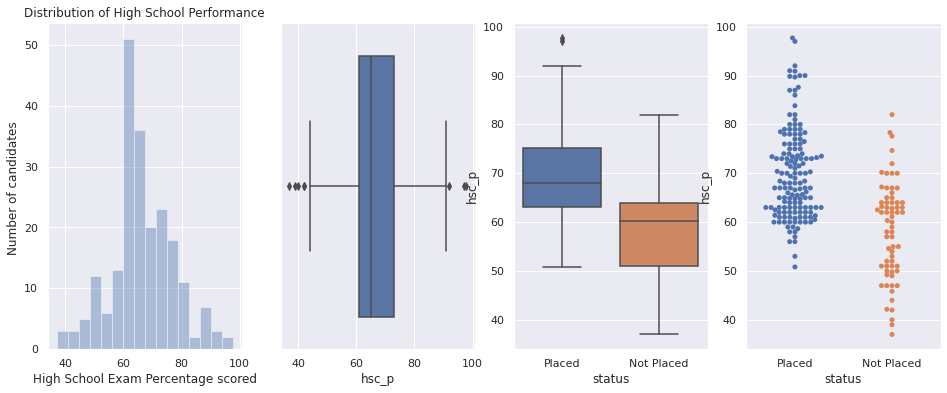

In [21]:

plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of High School Performance")
sns.distplot(a=my_data.hsc_p,kde=False)
plt.xlabel("High School Exam Percentage scored")
plt.ylabel("Number of candidates ")
plt.subplot(142)
sns.boxplot(x=my_data.hsc_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.hsc_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.hsc_p)
plt.show()

* Most of the students scored between 60% and 70% in High school
* Students that scored below 50% are not hired.
* Students that score very high marks are employed, however, there student(s) that score as high as 80% or more but are not hired.

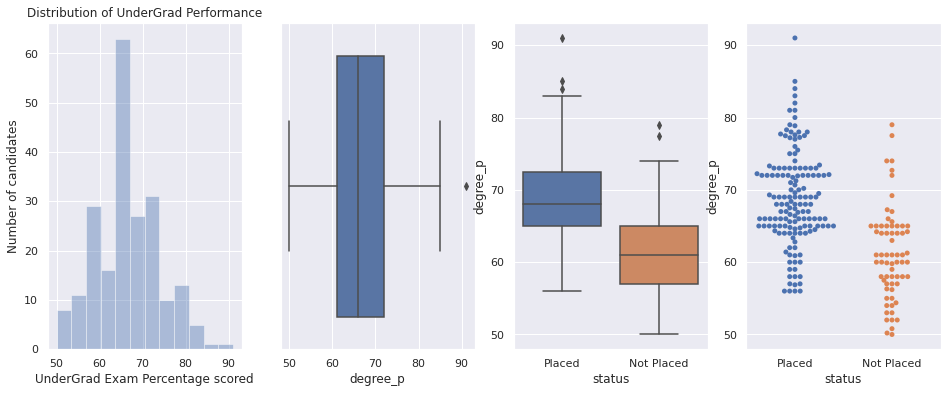

In [22]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of UnderGrad Performance")
sns.distplot(a=my_data.degree_p,kde=False)
plt.xlabel("UnderGrad Exam Percentage scored")
plt.ylabel("Number of candidates")
plt.subplot(142)
sns.boxplot(x=my_data.degree_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.degree_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.degree_p)
plt.show()

* Most of the students performed well in their undergraduate studies.
* Students that scored below 55% percent are not hired while those that scored very high grades are hired.
* There is a good number of candidates that performed well but could not land jobs.

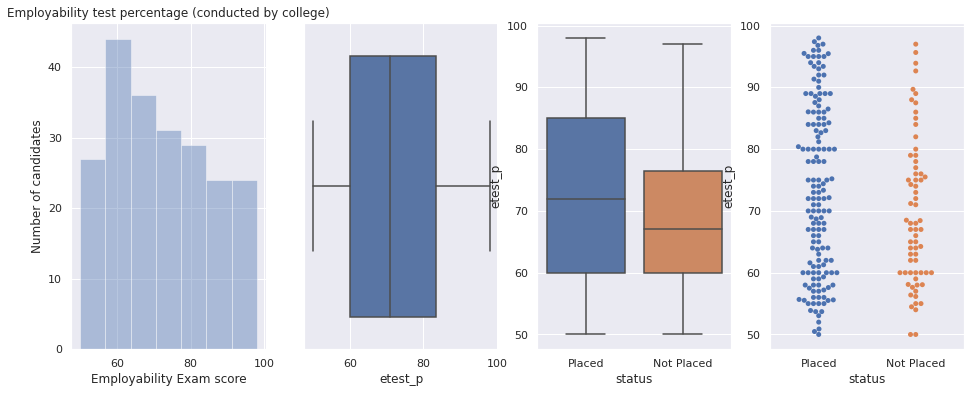

In [23]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Employability test percentage (conducted by college)")
sns.distplot(a=my_data.etest_p,kde=False)
plt.xlabel("Employability Exam score")
plt.ylabel("Number of candidates")
plt.subplot(142)
sns.boxplot(x=my_data.etest_p)
plt.subplot(143)
sns.boxplot(x=my_data.status, y=my_data.etest_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.etest_p)
plt.show()

* The professional test does not influence the possibility of being employed much, because students that are unemployed did not perform poorly.

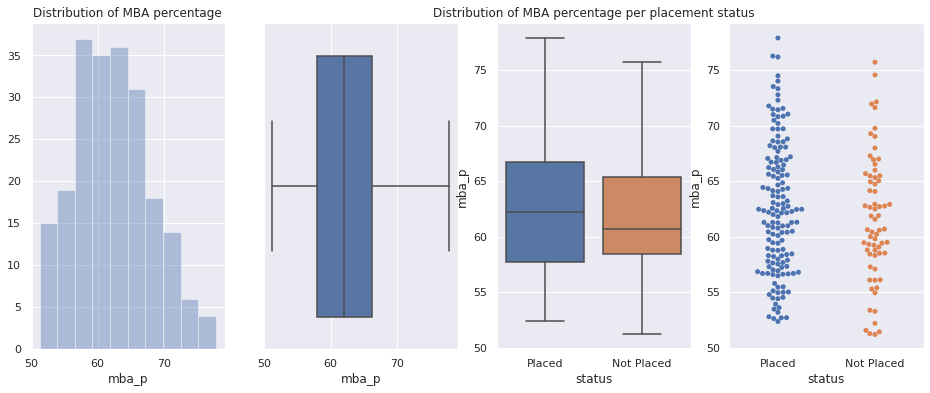

In [24]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of MBA percentage")
sns.distplot(a=my_data.mba_p,kde=False)
plt.subplot(142)
sns.boxplot(x=my_data.mba_p)
plt.subplot(143)
plt.title("Distribution of MBA percentage per placement status")
sns.boxplot(x=my_data.status, y=my_data.mba_p)
plt.subplot(144)
sns.swarmplot(x=my_data.status, y=my_data.mba_p)
plt.show()

* Most of the students scored between 57% - 66%. 
* Students that did not land jobs did not perform terribly in their graduate studies.

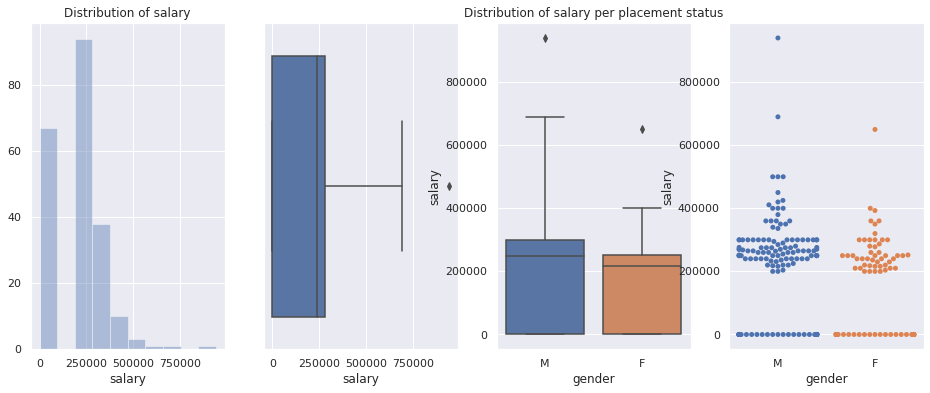

In [93]:
plt.figure(figsize=(16,6))
plt.subplot(141)
plt.title("Distribution of salary")
sns.distplot(a=my_data.salary,kde=False)
plt.subplot(142)
sns.boxplot(x=my_data.salary)
plt.subplot(143)
plt.title("Distribution of salary per placement status")
sns.boxplot(x=my_data.gender, y=my_data.salary)
plt.subplot(144)
sns.swarmplot(x=my_data.gender, y=my_data.salary)

plt.show()

* This is distribution is skew to the right.
* The presence of outliers is due to the fact that few of the candidates receive very huge salaries.
* Males receive higher salaries than females.

Below is the relationship between the employability status and the individual categories****

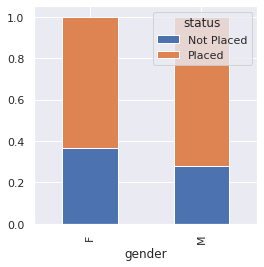

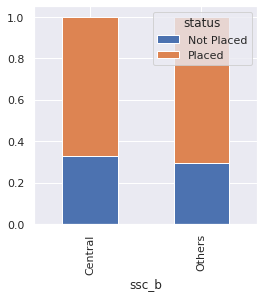

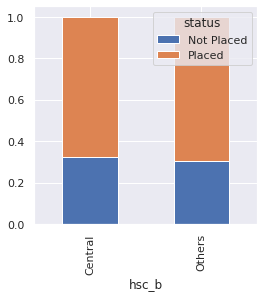

In [92]:
Gender=pd.crosstab(my_data['gender'],my_data['status']) 
Gender.div(Gender.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

ssbe = pd.crosstab(my_data.ssc_b,my_data.status)
ssbe.div(ssbe.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

hsbe = pd.crosstab(my_data.hsc_b,my_data.status)
hsbe.div(hsbe.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


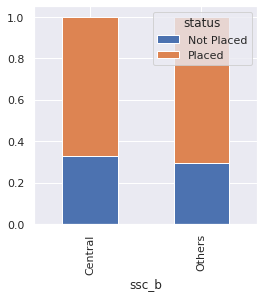

In [27]:
ssbe = pd.crosstab(my_data.ssc_b,my_data.status)
ssbe.div(ssbe.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

* The number of males employed are higher than that of the females
* Cadidates that attend the institutions managed by the central body are less employed as compare to the others

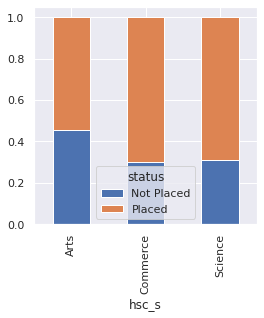

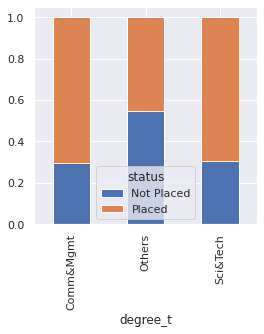

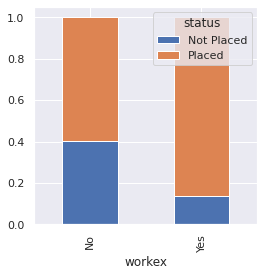

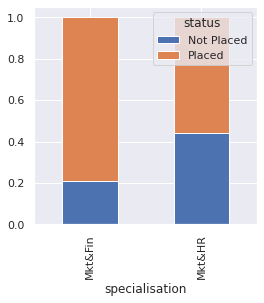

In [28]:
hscs = pd.crosstab(my_data.hsc_s,my_data.status)
hscs.div(hscs.sum(1),axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

degreeT = pd.crosstab(my_data.degree_t,my_data.status)
degreeT.div(degreeT.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

workX = pd.crosstab(my_data.workex,my_data.status)
workX.div(workX.sum(1), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

specialty = pd.crosstab(my_data.specialisation, my_data.status)
specialty.div(specialty.sum(1), axis=0).plot(kind="bar", stacked="True", figsize=(4,4))

* Most of the students that studied arts in high school are the least employed
* Students that specialised in either Comm&Mgt or Sci&Tech are mostly employed.
* Most of the cadidates with work experience had job placements.
* Candidates that specialised in Marketing & Finance hard more job placements than those that studied Marketing & Human Resource.

# Correlation Amongst numeric features

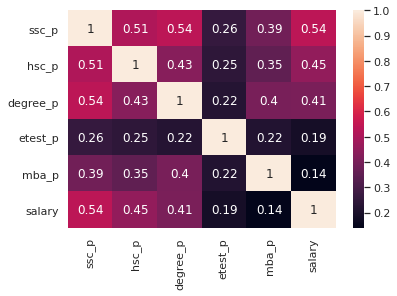

In [29]:
mycorr = my_data[['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']].corr()
sns.heatmap(mycorr,annot=True)

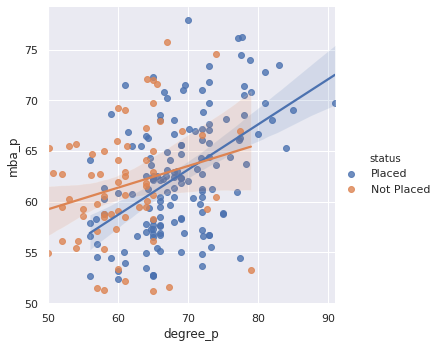

In [30]:
sns.lmplot(x="degree_p", y="mba_p", hue="status", data=my_data)

Candidates with very high degree percentage had very high MBA percentage and they have job placement. Candidates with very low degree percentage, usually had a very low or low MBA percentage and are not placed. 
However, there are unmeployed candidates who had high degree percentage and high MBA score percentage. There is a positive correlation between degree score and MBA percentage for both employed and unemployed cadidates, but correlation between degree score and MBA percentage for employed candidates is stronger than unemployed candidates. 

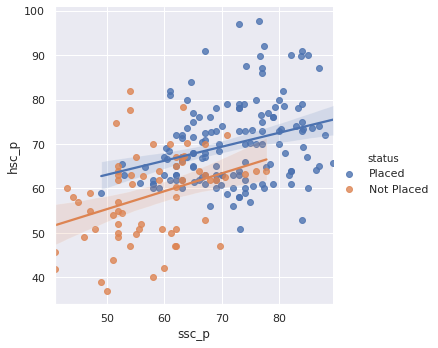

In [31]:
sns.lmplot(x="ssc_p", y="hsc_p", hue="status", data=my_data)

Candidates that had high percentage in secondary school had high grades in higher school and are employed whereas those that had low grades in secondary school had low grades in higher school and are not employed

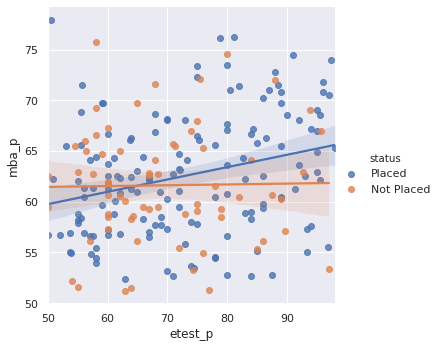

In [32]:
sns.lmplot(x="etest_p", y="mba_p", hue="status", data=my_data)

There is a poor relationship between the MBA percentage score and employability test percentage.

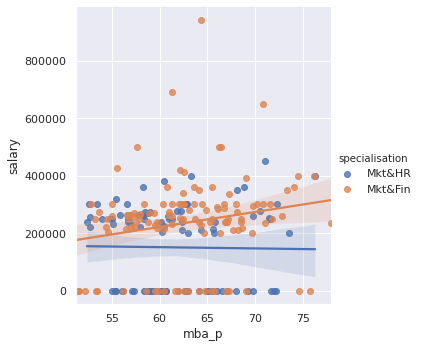

In [89]:
sns.lmplot(x="mba_p", y="salary", hue="specialisation", data=my_data)

* Candidates that specialized in Mk&Fin gain higher salaries than those in Mk&HR

# DATA PROCESSING FOR CLASSIFICATION

In [33]:
#Separating the the independent variable(X) and the target variable(y) from the dataset
X = my_data.drop('status',axis=1)
y = my_data.status

We have to change categorical data to numerical for the consumption of the models. This will be done by encoding the the categorical features

In [34]:
#OneHotEncoding will be deployed to change encode categorical variables with more than two unique items
degreedummy = pd.get_dummies(X.degree_t)
hscsdummy = pd.get_dummies(X.hsc_s)

In [35]:
X = pd.concat([X, degreedummy], axis=1)
X = pd.concat([X, hscsdummy], axis=1)

In [36]:
# drop original column of onehotencoded columns from X
X.drop("degree_t", axis = 1, inplace=True)
X.drop("hsc_s", axis = 1, inplace=True)

#Droping Salary since unemployed candidates automatically have 0 salary
X.drop("salary", axis = 1, inplace=True)

In [37]:
#LabelEncoder will be deployed to encode variables with two unique items
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['gender'] = le.fit_transform(X.gender)
X['ssc_b'] = le.fit_transform(X.ssc_b)
X['hsc_b'] = le.fit_transform(X.hsc_b)
X['workex'] = le.fit_transform(X.workex)
X['specialisation'] = le.fit_transform(X.specialisation)
y = le.fit_transform(y)

In [38]:
#Standardizing the data to ensure all distributions are normal and also suppress outliers
from sklearn import preprocessing
X['etest_p'] = preprocessing.scale(X.etest_p)
X['degree_p'] = preprocessing.scale(X.degree_p)
X['mba_p'] = preprocessing.scale(X.mba_p)
X['ssc_p'] = preprocessing.scale(X.ssc_p)
X['hsc_p'] = preprocessing.scale(X.hsc_p)
X['degree_p'] = preprocessing.scale(X.degree_p)

In [39]:
X.tail()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,Comm&Mgmt,Others,Sci&Tech,Arts,Commerce,Science
sl_no,,,,,,,,,,,,,,,,
211,1,1.230940,1,1.441008,1,1.529612,0,1.426906,0,2.098321,1,0,0,0,1,0
212,1,-0.861266,1,-0.582513,1,0.766836,0,0.143408,0,-1.487711,0,0,1,0,0,1
213,1,-0.028087,1,0.061335,1,0.903046,1,-0.989091,0,1.278706,1,0,0,0,1,0
214,0,0.619941,1,-0.030644,1,-1.140102,0,-0.158592,1,-0.351934,1,0,0,0,1,0
215,1,-0.490964,0,-0.766470,1,-1.821152,0,1.275907,1,-0.353652,1,0,0,0,0,1


In [40]:
X.shape, y.shape

((215, 16), (215,))

In [41]:
#Split data for training & validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state = 1)

# **MACHINE LEARNING**

**TASK:** To predict whether a candidate got hired or not

**Implementing Classification models**

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

***DecisionTreeClassifier***

In [43]:
#Decision Tree


dmodel = DecisionTreeClassifier()

dmodel.fit(X_train,y_train)

y_predx = dmodel.predict(X_test)

In [44]:
accuracy_score(y_predx,y_test)

0.8

In [47]:
print(classification_report(y_test,y_predx))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



[[12  8]
 [ 5 40]]


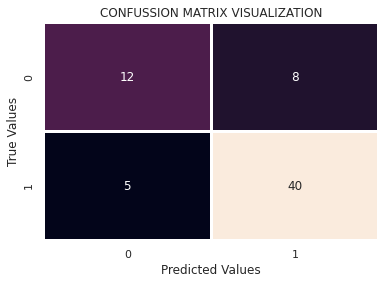

In [48]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predx))

sns.heatmap(confusion_matrix(y_test,y_predx),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

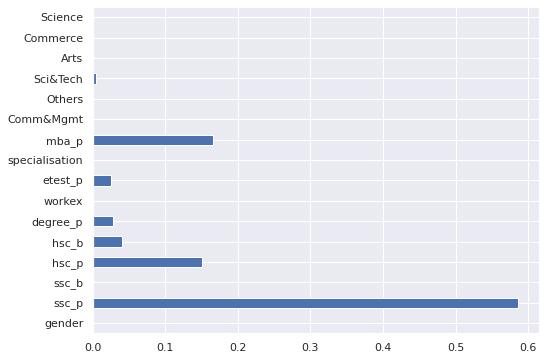

In [49]:
importances=pd.Series(dmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model correctly predicted 40 candidates as employed and 12 as unemployed. It made a combined 13(thus 8+5) wrong predictions.
* Secondary percentage,MBA grade ,higher school percentage influence the model's decision most.
* A precision of 79% and recall of 80%
* The predicted values has 80% similarity with the actual values

***RandomForestClassifier***

In [50]:
#Random Forest
rtmodel=RandomForestClassifier()

rtmodel.fit(X_train,y_train)
y_predr = rtmodel.predict(X_test)

In [51]:
accuracy_score(y_predr,y_test)

0.8461538461538461

[[13  7]
 [ 3 42]]


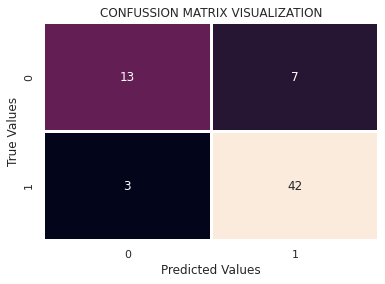

In [52]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predr))

sns.heatmap(confusion_matrix(y_test,y_predr),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [54]:
print(classification_report(y_test,y_predr))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        20
           1       0.86      0.93      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.79      0.81        65
weighted avg       0.84      0.85      0.84        65



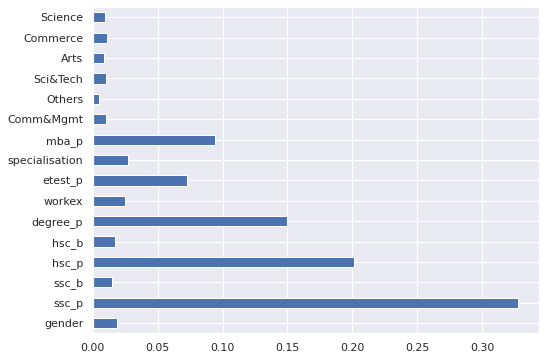

In [53]:
importances=pd.Series(rtmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model's prediction is 85% similar to the actual values.
* There were 42 true positives (correctly predicted as employed), 12 true negatives(correctly predicted as negative),7 type 1 errors or false positives (wrongly predicted as employed) and 3 type 2 errors (wrongly predicted as umeployed).
* The model had 84% precision and 85% recall.

**GridSearchCV** is deployed to retrieve the most optimum parameters for the random tree regression model

In [65]:
#Boost for random forest

from sklearn.model_selection import GridSearchCV

In [66]:
# Provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators 
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [67]:
# Fit the grid search model 
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [69]:
# Estimating the optimized value 
grid_search.best_estimator_

RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)

In [70]:
RFCmodel = RandomForestClassifier(max_depth=3, n_estimators=141, random_state=1)
RFCmodel.fit(X_train,y_train)
y_predrfc = RFCmodel.predict(X_test)

In [71]:
accuracy_score(y_predrfc,y_test)

0.8153846153846154

[[10 10]
 [ 2 43]]


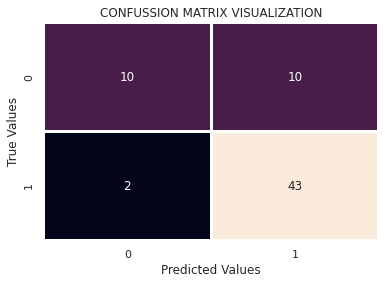

In [94]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predrfc))

sns.heatmap(confusion_matrix(y_test,y_predrfc),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [72]:
print(classification_report(y_test,y_predrfc))

              precision    recall  f1-score   support

           0       0.83      0.50      0.62        20
           1       0.81      0.96      0.88        45

    accuracy                           0.82        65
   macro avg       0.82      0.73      0.75        65
weighted avg       0.82      0.82      0.80        65



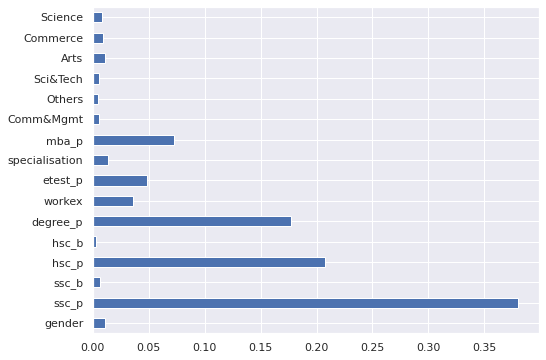

In [74]:
importances=pd.Series(RFCmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The model recorded 82% accuracy.
* There was 82% precision and 82% recall.
* Secondary school performance influenced the model's decion the most.
* 43 true positives(correctly predicted as employed), 10 true negatives(correctly predicted as unemployed), 10 false positives(type 1 error)(wrongly predicted unemployed candidate as employed) and 2 false negatives (type 2 error)(wrongly predicted employed candidate as unemployed).

***XGBoost***

In [ ]:
#pip install xgboost

In [59]:
from xgboost import XGBClassifier

In [60]:
# fit model no training data
XGmodel = XGBClassifier()
XGmodel.fit(X_train, y_train)
y_predXG = XGmodel.predict(X_test)

In [61]:
accuracy_score(y_predXG,y_test)

0.8769230769230769

[[16  4]
 [ 4 41]]


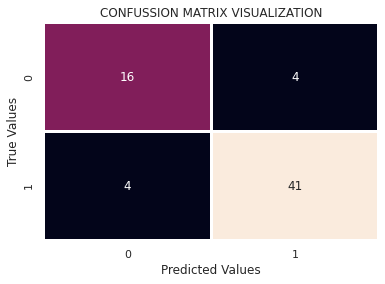

In [62]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predXG))

sns.heatmap(confusion_matrix(y_test,y_predXG),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [64]:
print(classification_report(y_test,y_predXG))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.91      0.91      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.86      0.86        65
weighted avg       0.88      0.88      0.88        65



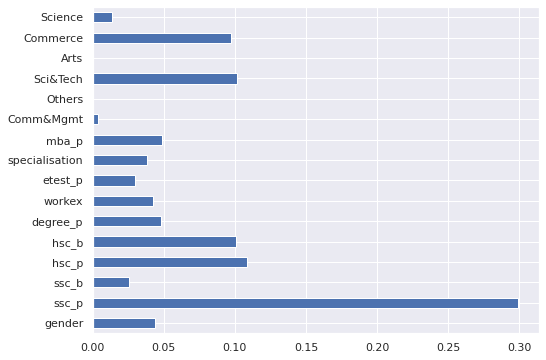

In [63]:
importances=pd.Series(XGmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* XGBoost model provided an accuracy score of 88%
* 88% precision and 88% recall
* Correctly predicted 41 candidates as employed, 16 correctedly predicted as unemployed and 8 wrong predictions.

***LIGHTGBM***

In [75]:
from lightgbm import LGBMClassifier

In [76]:
# fit the model on the whole dataset
LGmodel = LGBMClassifier()
LGmodel.fit(X_train, y_train)
y_predL = LGmodel.predict(X_test)

In [77]:
accuracy_score(y_predL,y_test)

0.8769230769230769

[[15  5]
 [ 3 42]]


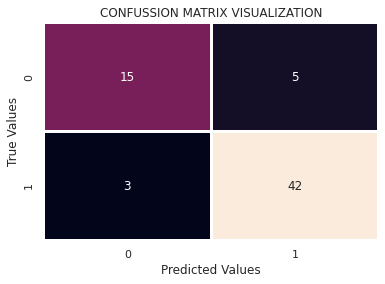

In [88]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predL))

sns.heatmap(confusion_matrix(y_test,y_predL),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [78]:
print(classification_report(y_test,y_predL))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg       0.88      0.88      0.88        65



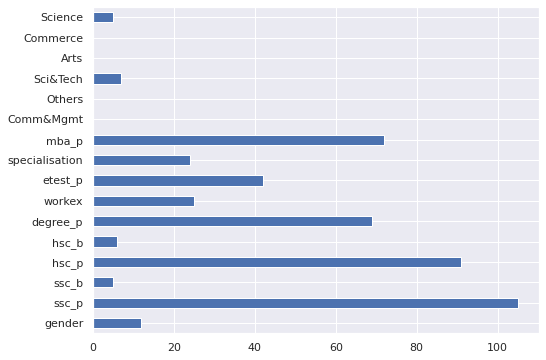

In [79]:
importances=pd.Series(LGmodel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* The lightGBM model delivered an accuracy rate of 88%.
* 88% Recall and 88% precision scores.
* Secondary school percentage, High School percentage, MBA percentage and degree score, greatly influenced the    model's decisions.
* Correctly predicted 42 candidates as employed, 15 correctedly predicted as unemployed and 8 wrong predictions.


***Catboost***

In [ ]:
#pip install catboost

In [80]:
from catboost import CatBoostClassifier

In [81]:
CatModel = CatBoostClassifier()
CatModel.fit(X_train,y_train)
y_predCat = CatModel.predict(X_test)

Learning rate set to 0.004583
0:	learn: 0.6898864	total: 53.7ms	remaining: 53.6s
1:	learn: 0.6865931	total: 54.9ms	remaining: 27.4s
2:	learn: 0.6828043	total: 56ms	remaining: 18.6s
3:	learn: 0.6787209	total: 57.1ms	remaining: 14.2s
4:	learn: 0.6753042	total: 58.1ms	remaining: 11.6s
5:	learn: 0.6718107	total: 59.1ms	remaining: 9.8s
6:	learn: 0.6683066	total: 60.3ms	remaining: 8.55s
7:	learn: 0.6648376	total: 61.4ms	remaining: 7.61s
8:	learn: 0.6610865	total: 62.6ms	remaining: 6.89s
9:	learn: 0.6575755	total: 63.6ms	remaining: 6.3s
10:	learn: 0.6546631	total: 64.3ms	remaining: 5.78s
11:	learn: 0.6510681	total: 65.4ms	remaining: 5.39s
12:	learn: 0.6479614	total: 66.6ms	remaining: 5.06s
13:	learn: 0.6446444	total: 67.8ms	remaining: 4.77s
14:	learn: 0.6419638	total: 68.9ms	remaining: 4.53s
15:	learn: 0.6386813	total: 70.2ms	remaining: 4.32s
16:	learn: 0.6355751	total: 71.4ms	remaining: 4.13s
17:	learn: 0.6324552	total: 72.6ms	remaining: 3.96s
18:	learn: 0.6290938	total: 73.8ms	remaining: 3.

275:	learn: 0.2701702	total: 372ms	remaining: 977ms
276:	learn: 0.2695511	total: 374ms	remaining: 976ms
277:	learn: 0.2688334	total: 375ms	remaining: 974ms
278:	learn: 0.2682214	total: 376ms	remaining: 973ms
279:	learn: 0.2677881	total: 377ms	remaining: 971ms
280:	learn: 0.2672298	total: 379ms	remaining: 969ms
281:	learn: 0.2665556	total: 380ms	remaining: 967ms
282:	learn: 0.2660998	total: 381ms	remaining: 965ms
283:	learn: 0.2656702	total: 382ms	remaining: 963ms
284:	learn: 0.2650923	total: 383ms	remaining: 961ms
285:	learn: 0.2647418	total: 384ms	remaining: 959ms
286:	learn: 0.2640096	total: 386ms	remaining: 958ms
287:	learn: 0.2634074	total: 387ms	remaining: 956ms
288:	learn: 0.2626831	total: 388ms	remaining: 954ms
289:	learn: 0.2621491	total: 389ms	remaining: 952ms
290:	learn: 0.2615573	total: 390ms	remaining: 951ms
291:	learn: 0.2607343	total: 391ms	remaining: 949ms
292:	learn: 0.2603016	total: 393ms	remaining: 947ms
293:	learn: 0.2596107	total: 394ms	remaining: 946ms
294:	learn: 

591:	learn: 0.1528188	total: 744ms	remaining: 513ms
592:	learn: 0.1525580	total: 746ms	remaining: 512ms
593:	learn: 0.1522512	total: 747ms	remaining: 510ms
594:	learn: 0.1520266	total: 748ms	remaining: 509ms
595:	learn: 0.1517321	total: 749ms	remaining: 508ms
596:	learn: 0.1514443	total: 750ms	remaining: 506ms
597:	learn: 0.1512130	total: 751ms	remaining: 505ms
598:	learn: 0.1509504	total: 753ms	remaining: 504ms
599:	learn: 0.1508217	total: 754ms	remaining: 503ms
600:	learn: 0.1505969	total: 755ms	remaining: 501ms
601:	learn: 0.1503613	total: 756ms	remaining: 500ms
602:	learn: 0.1500638	total: 758ms	remaining: 499ms
603:	learn: 0.1498504	total: 759ms	remaining: 498ms
604:	learn: 0.1496977	total: 760ms	remaining: 496ms
605:	learn: 0.1494307	total: 761ms	remaining: 495ms
606:	learn: 0.1491605	total: 762ms	remaining: 494ms
607:	learn: 0.1489605	total: 764ms	remaining: 492ms
608:	learn: 0.1486488	total: 765ms	remaining: 491ms
609:	learn: 0.1484665	total: 766ms	remaining: 490ms
610:	learn: 

901:	learn: 0.0985742	total: 1.11s	remaining: 121ms
902:	learn: 0.0984627	total: 1.11s	remaining: 120ms
903:	learn: 0.0982358	total: 1.11s	remaining: 118ms
904:	learn: 0.0980778	total: 1.12s	remaining: 117ms
905:	learn: 0.0979206	total: 1.12s	remaining: 116ms
906:	learn: 0.0978152	total: 1.12s	remaining: 115ms
907:	learn: 0.0977282	total: 1.12s	remaining: 113ms
908:	learn: 0.0976051	total: 1.12s	remaining: 112ms
909:	learn: 0.0974566	total: 1.12s	remaining: 111ms
910:	learn: 0.0973156	total: 1.12s	remaining: 110ms
911:	learn: 0.0971922	total: 1.12s	remaining: 109ms
912:	learn: 0.0970354	total: 1.13s	remaining: 107ms
913:	learn: 0.0968683	total: 1.13s	remaining: 106ms
914:	learn: 0.0967601	total: 1.13s	remaining: 105ms
915:	learn: 0.0966566	total: 1.13s	remaining: 104ms
916:	learn: 0.0965074	total: 1.13s	remaining: 102ms
917:	learn: 0.0963767	total: 1.13s	remaining: 101ms
918:	learn: 0.0962061	total: 1.13s	remaining: 100ms
919:	learn: 0.0960054	total: 1.14s	remaining: 98.8ms
920:	learn:

In [82]:
accuracy_score(y_predCat,y_test)

0.8461538461538461

[[12  8]
 [ 2 43]]


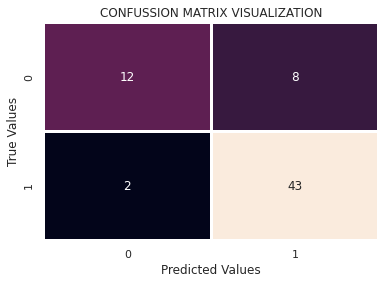

In [83]:
#confusion matrix: Idea for a yes/no predictions
print(confusion_matrix(y_test,y_predCat))

sns.heatmap(confusion_matrix(y_test,y_predCat),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSSION MATRIX VISUALIZATION")
plt.show()

In [85]:
print(classification_report(y_test,y_predCat))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



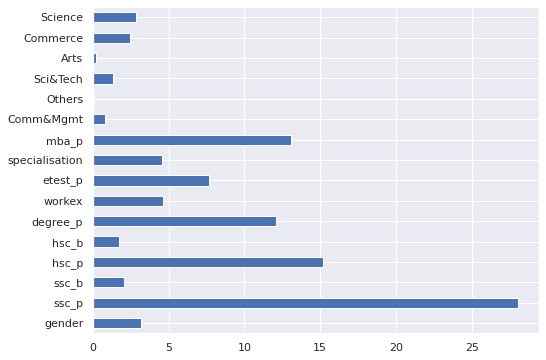

In [86]:
importances=pd.Series(CatModel.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(8,6))

* This model made classifications with 85% accuracy.
* Both precision & recall are at 85%
* Secondary school percentage influence the decisions most.
* The model correctly predicted 43 candidates as employed,it correctly predicted  12 candidates as unemployed. 8 candidates were wrongly predicted as employed and 2 candidates were wrongly predicted as unemployed

# CONCLUSION

* Gender does not inflence your chances of getting hired.
* Academic grades play a massive role in your chances of getting hired. Very high grades increases your chances of getting hired.
* Candidates that specialised in Marketing and Finance relatively gain higher salaries than their counterparts in Marketing and Human Resource.
* Employability test performance do not enhance your chances of getting hired.